In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load dataset
dataset = pd.read_csv('./mtcars.csv')
dataset.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Remove Model Column
dataset2=dataset.drop('model',axis=1)
dataset2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# Overview of Dataset Characteristics
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


In [5]:
# Summary of N/A Values
dataset2.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

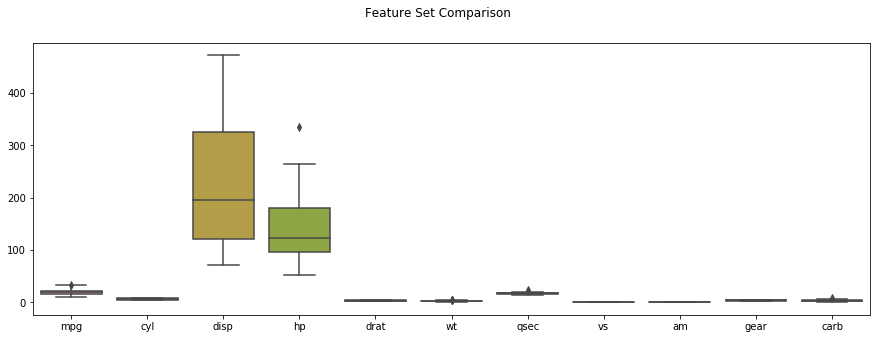

In [6]:
# BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

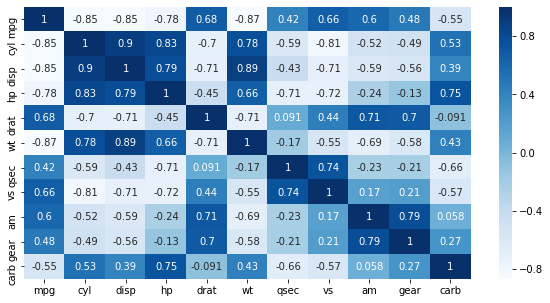

In [7]:
# Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset2.corr(),annot=True,cmap="Blues")

In [8]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset2,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('cyl', 'mpg'), ('disp', 'mpg'), ('disp', 'cyl'), ('hp', 'cyl'), ('wt', 'mpg'), ('wt', 'disp'), ('vs', 'cyl')]


In [9]:
# Create x and y variables
x = dataset2.drop('mpg', axis=1).values
Y = dataset2['mpg'].values

#Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 100) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

#Models
from sklearn.neighbors import KNeighborsRegressor

In [10]:
# Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=Y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,
                                                            n_jobs=1)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([0,15])
    plt.show()

k-NN Regressor Learning Curve


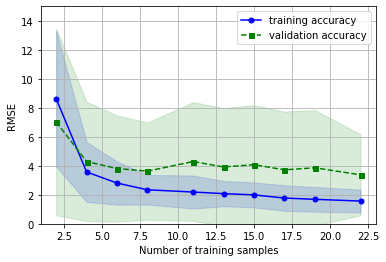

In [11]:
# Plot Learning Curve
print('k-NN Regressor Learning Curve')
plot_learning_curves(KNeighborsRegressor(2))

In [12]:
# Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn import metrics  

#k-NN Regression Model
knnreg2 = KNeighborsRegressor()
k_range = range(1, 10)
param_grid = { 
           'n_neighbors': k_range,
           'algorithm' : ['auto','ball_tree','kd_tree','brute'],
           'weights' : ['uniform','distance']}

knn_model = GridSearchCV(knnreg2, param_grid, cv=10, verbose=0,
                         n_jobs=-1,scoring='neg_mean_squared_error')

grids = [knn_model] 
grid_dict = {0:'k-NN Regression Model'}

#Model Creation

#Create Heading
print('Optimized Models') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: {}'.format(grid_dict[idx])) 
     #Fit grid search
     optmodel.fit(x_train2, Y_train) 
     #Best params 
     print('\nBest params: {}'.format(optmodel.best_params_)) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
     # Test data accuracy of model with best params    
     print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred3)))
     print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred3)))  
     print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(Y_test, y_pred3)))  
     print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))))  

Optimized Models

Estimator: k-NN Regression Model

Best params: {'algorithm': 'brute', 'n_neighbors': 1, 'weights': 'distance'}

R2: 0.77
Mean Absolute Error: 2.14
Mean Squared Error: 6.11
Root Mean Squared Error: 2.47


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
